In [1]:
import numpy as np

In [159]:
def trapezoid(x, a, b,c ,d):
    return np.maximum(np.minimum((x-a)/(b-a),np.minimum((d-x)/(d-c),1)),0)

def triangular(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a),(c-x)/(c-b)),0)

def sigmoid(x, a, c):
    return 1.0/(1.0 + np.exp(-a*(x-c)))

def gauss(x, c, sigma):
    return np.exp(-(x-c)**2/(2*sigma**2))

In [160]:
t = np.linspace(-3,3,100)

In [161]:
print(t)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [162]:
tr = trapezoid(t, -1, 0, 2, 3)
tr2 = trapezoid(t, -9, -6, -1, 0)
tr3 = trapezoid(t, 2, 3, 7, 9)

In [163]:
np.maximum(t,0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03030303, 0.09090909, 0.15151515, 0.21212121, 0.27272727,
       0.33333333, 0.39393939, 0.45454545, 0.51515152, 0.57575758,
       0.63636364, 0.6969697 , 0.75757576, 0.81818182, 0.87878788,
       0.93939394, 1.        , 1.06060606, 1.12121212, 1.18181818,
       1.24242424, 1.3030303 , 1.36363636, 1.42424242, 1.48484

In [164]:
import matplotlib.pyplot as plt

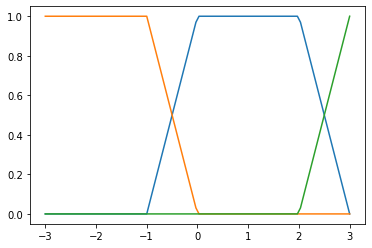

In [165]:
plt.plot(t,tr)
plt.plot(t,tr2)
plt.plot(t,tr3)

In [166]:
tri1 = triangular(t, -3, -1, 1)
tri2 = triangular(t, 0, 1, 2)
tri3 = triangular(t, 2, 3, 4)

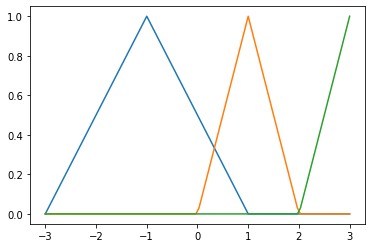

In [167]:
plt.plot(t,tri1)
plt.plot(t,tri2)
plt.plot(t,tri3)

In [168]:
g1 = gauss(t, 0, 1)
g2 = gauss(t, 2, 1)
g3 = gauss(t, -1.5, 1)

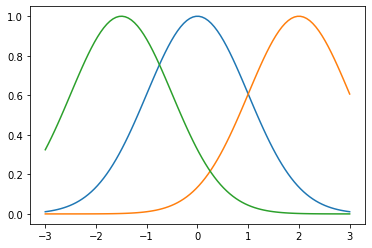

In [169]:
plt.plot(t,g1)
plt.plot(t,g2)
plt.plot(t,g3)

In [170]:
# Chapter 2, Example 2 
# from Fuzzy Control Systems Design and Analysis: A Linear Matrix Inequality Approach
# Kazuo Tanaka, Hua O. Wang


def premises(x):
    return np.array([
        x[0]*x[1]**2,
        (3 + x[0])*x[1]**2
    ])

def memberships(z):
    return np.array([
        [(z[0] + 1)/2.0,
         (1 - z[1])/2.0,
         z[2]/4.0,
         (4 - z[3])/4.0]
    ])

def m1(z):
    return (z + 1)/2.0

def m2(z):
    return (1 - z)/2.0

def n1(z):
    return z/4.0

def n2(z):
    return (4.0 - z)/4.0
    
A1 = np.array([[-1,  1],
               [ 4, -1]])
A2 = np.array([[-1,  1],
               [ 0, -1]])
A3 = np.array([[-1, -1],
               [ 4, -1]])
A4 = np.array([[-1, -1],
               [ 0, -1]])

In [173]:
# Defuzzification
def defuzz(x):
    hyp = np.ndarray(shape=(4,2))
    z = premises(x)
    hyp[0] = m1(z[0])*n1(z[1])*np.dot(A1, x)
    hyp[1] = m1(z[0])*n2(z[1])*np.dot(A2, x)
    hyp[2] = m2(z[0])*n1(z[1])*np.dot(A3, x)
    hyp[3] = m2(z[0])*n2(z[1])*np.dot(A4, x)
    return np.sum(hyp, axis=0)

x1 = np.arange(-1, 1, 0.025)
x2 = np.arange(-1, 1, 0.025)

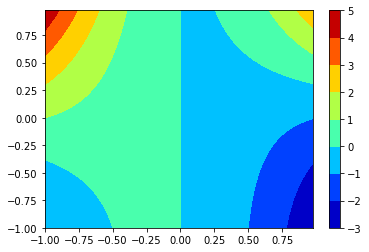

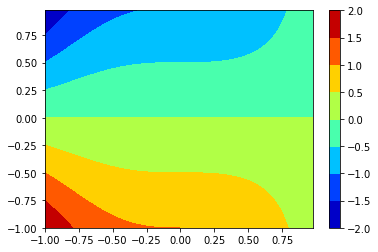

In [174]:
grid = np.meshgrid(x1, x2)
R0 = []
for xx in x1:
    R=[]
    for yy in x2:
        R.append(defuzz(np.array([xx, yy])))
    R0.append(R)
gri = np.array(R0)
plt.contourf(x1, x2, gri[:,:,1], cmap="jet")
plt.colorbar()
plt.show()
plt.contourf(x1, x2, gri[:,:,0], cmap="jet")
plt.colorbar()
plt.show()